# Problem Set 4, due '05/23/2017' at 3:30pm.

### Before You Start

This is a fun but challenging problem set. It will test your python skills, as well as your understanding of the material in class and in the readings. Start early and debug often! Some notes:

* Part 1 is meant to be easy, so get through it quickly.
* Part 2 (especially 2.1) will be difficult, but it is the lynchpin of this problem set to make sure to do it well and understand what you've done. If you find your gradient descent algorithm is taking more than a few minutes to complete, debug more, compare notes with others, and go to the TA sessions.
* Depending on how well you've done 2.1, parts 2.3 and 4.3 will be relatively painless or incredibly painful. 
* Part 4 (especially 3.3) will be computationally intensive. Don't leave this until the last minute, otherwise your code might be running when the deadline arrives.
* Do the extra credit problems last.

---

## Introduction to the assignment

As with the last assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).

In [1]:
import sklearn
print (sklearn.__version__)


0.18.1


In [2]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

%matplotlib inline  
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import time

In [3]:
from sklearn.datasets import load_boston
bdata = load_boston()


---

## Part 1: Getting oriented

Use different learning rates

### 1.1 Use existing libraries

Soon, you will write your own gradient descent algorithm, which you will then use to minimize the squared error cost function.  First, however, let's use the canned versions that come with Python, to make sure we understand what we're aiming to achieve.

Using the same Boston housing prices dataset, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to explore the relationship between  median housing price and number of rooms per house. Do this by first (a) regressing the housing price on the number of rooms per house, and then (b) regressing the housing price on the number of rooms per house and the (number of rooms per house) squared.  Interpret your results.

data shape: (506, 13)
(506, 14)
Coef of housing price on number of rooms: [ 9.10210898]
intercept of housing price on number of rooms: -34.6706207764


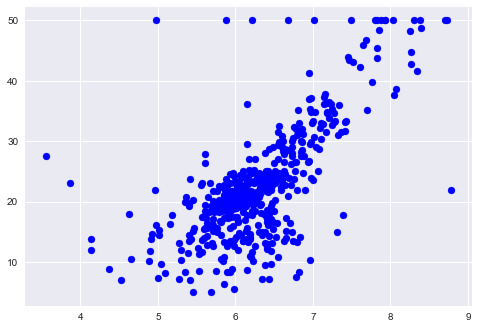

Coef of housing price on number of rooms and square the number of rooms: [-22.64326237   2.47012384]
intercept of housing price on number of rooms and square the number of rooms: 66.0588474846


In [230]:
# uncomment the following if you want to see a lengthy description of the dataset
# print "keys:", bdata.keys()
# print "feature names:",  bdata.feature_names
print ("data shape:", bdata.data.shape)
# print "target shape", bdata.target.shape
#print (bdata.DESCR)
# print "-"*80
bdata_df = pd.DataFrame(data= np.c_[bdata['data'],bdata['target']],
                        columns=np.append(bdata['feature_names'],['target']))
bdata_m = bdata_df.as_matrix()
#regressing the housing price on the number of rooms per house.
model=LinearRegression()
print(bdata_m.shape)
X=bdata_m[:,5]
Y=bdata_m[:,13]
#print(X.shape)
#print(Y.shape)
model.fit(X.reshape(len(X),1),Y.reshape(len(Y),1))
#print ("residuals",model.residues_)
plt.scatter(X,Y,color='blue')
print("Coef of housing price on number of rooms:",model.coef_)
print("intercept of housing price on number of rooms:",model.intercept_)

#regressing the housing price on the number of rooms per house squared
model=LinearRegression()
X=bdata_m[:,[5,5]]
Y=bdata_m[:,13]
X[:,1]=X[:,1]*X[:,1]
model.fit(X.reshape(len(X),2),Y.reshape(len(Y),1))
#print ("residuals:",model.residues_)
plt.show()
#plt.scatter(X,Y,color='black')
print("Coef of housing price on number of rooms and square the number of rooms:",model.coef_)
print("intercept of housing price on number of rooms and square the number of rooms:",model.intercept_)


From the intercept we can conclude that housing price is dependent on the number of rooms in the house heavily. If the number of room in the house increases by one, the price of the house increase by 9 times. Another interpretation is if the housing price goes up by 2 times if number of rooms in the house is multiplied by itself.

### 1.2 Training and testing

Chances are, for the above problem you used all of your data to fit the regression line. In some circumstances this is a reasonable thing to do, but often this will result in overfitting. Let's redo the above results the ML way, using careful cross-validation.  Since you are now experts in cross-validation, and have written your own cross-validation algorithm from scratch, you can now take a shortcut and use the libraries that others have built for you.

Using the [cross-validation functions](http://scikit-learn.org/stable/modules/cross_validation.html) from scikit-learn, use 250-fold cross-validation to fit regression (a) above, i.e. the linear fit of housing price on number of rooms per house.
Each fold of cross-validation will give you one slope coefficient and one intercept coefficient.  Plot the distribution of the 250 slope coefficients, and draw a vertical line at the value of the slope coefficient that you estimated in 1.1 using the full dataset.  What do you notice?

Note: please use 'random_state=1' and keep 'shuffle=False' when doing the KFold splitting to ensure reproducibility!

KFold(n_splits=250, random_state=1, shuffle=False)
Accuracy: -271.37 (+/- 2658.19)
(250, 1)


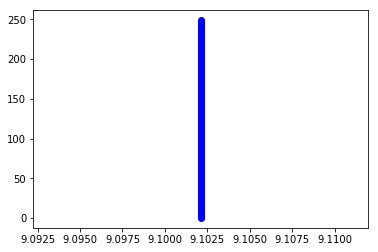

In [204]:
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=250,shuffle=False,random_state=1)
print (kf)
slope=np.ndarray(shape=(250,1))
intercept=np.ndarray(shape=(250,1))
model1=LinearRegression()
model2=LinearRegression()
i=0;
X=bdata_m[:,5]
Y=bdata_m[:,13]
scores = cross_val_score(model1, X.reshape(len(X),1),Y.reshape(len(Y),1), cv=250)
#print (scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
#plotting values for each fold
for train, test in kf.split(bdata_df): 
    #print(train)
    #print(test)
    X_train=(bdata_m[[train],5])
    Y_train=(bdata_m[[train],13])
    model2.fit(X.reshape(len(X),1),Y.reshape(len(Y),1))
    #print(model2.coef_)
    #print(model2.intercept_)
    slope[i]=model2.coef_
    intercept[i]=model2.intercept_
    i=i+1
#print(i)
slope=np.matrix(slope)
y= [i for i in range(250)]
y=np.matrix(y)
print(slope.shape)
y=y.T
plt.scatter(slope,y,color='blue')
#print(slope)




### 1.3 Regression lines

Create a scatterplot of housing price on rooms per house, and add the two regression lines from 1.1 (or 1.2 if you prefer to do so). Show the linear regression line in red, and the linear+quadratic regression line (which may have curvature) in blue.  Label these two regression lines with the corresponding regression equations (i.e. the slope and intercept of the line).

Bonus: Add the 95% confidence bands (i.e.,  the area that has a 95% chance of containing the true regression line) to each of these lines.

(506, 14)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

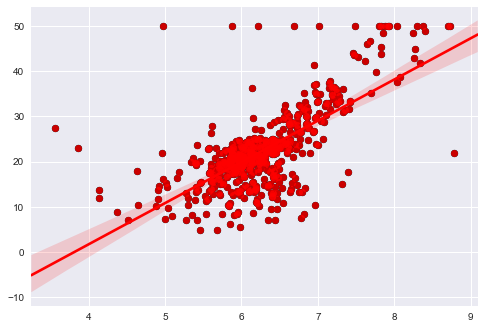

In [226]:
import seaborn as sns
model=LinearRegression()
print(bdata_m.shape)
X=bdata_m[:,5]
Y=bdata_m[:,13]
#print(X.shape)
#print(Y.shape)
model.fit(X.reshape(len(X),1),Y.reshape(len(Y),1))
#print (model.residues_)
#preds=model.predict(Y)
plt.scatter(X,Y,color='black')
sns.regplot(X, Y,color='red');

#regressing the housing price on the number of rooms per house squared
model2=LinearRegression()
X=bdata_m[:,[5,5]]
Y=bdata_m[:,13]
x=X[:,1]=X[:,1]*X[:,1]
model2.fit(X.reshape(len(X),2),Y.reshape(len(Y),1))
#plt.plot(x,model2.predict(Y))
#plt.scatter(X,Y,color='black')


## Part 2: Gradient descent: Linear Regression

This is where it gets fun!

### 2.1 Implement gradient descent with one independent variable (Average rooms per house)

Implement the batch gradient descent algorithm that we discussed in class. Use the version you implement to regress the housing price on the number of rooms per house. Experiment with 3-4 different values of the learning rate *R*, and do the following:

* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge (for each value of *R*)
* Report the total running time of your algorithm, in seconds

Some skeleton code is provided below, but you should feel free to delete this code and start from scratch if you prefer.

* *Hint 1: Don't forget to implement a stopping condition, so that at every iteration you check whether your results have converged. Common approaches to this are to (a) check to see if the loss has stopped decreasing; and (b) check if both your current parameter esimates are close to the estimates from the previous iteration.  In both cases, "close" should not be ==0, it should be <=epsilon, where epsilon is something very small (like 0.0001).*
* *Hint 2: It is always useful to include maximum number of iterations, otherwise a rogue estimation may go on forever.*

In [234]:
"""
    Function
    --------
    bivariate_ols: Gradient Decent to minimize OLS. Used to find coefficients of bivariate OLS Linear regression

    Parameters
    ----------
    xvalues, yvalues : narray xvalues: independent variable; yvalues: dependent variable
    R: float, Learning rate
    MaxIterations: Int, maximum number of iterations

    Returns
    -------
    alpha: float, intercept
    beta: float, co-efficient
    ttaken: time taken
    it: number of iterations
    convergence: logical, convergence achieved?
"""

np.seterr(all='ignore')

X=bdata_m[:,5]
Y=bdata_m[:,13]
def bivariate_ols(X,Y,R,MaxIterations):
    N=len(X)
    it=0
    cost=0
    convergence=False
    tolerance=0.02
   
    coef=[0,0]
    beta=np.zeros((506,1))
    gradient=0
    for i in range(MaxIterations):
        start_time = time.time()
        h=np.dot(X,beta)
        l=h-Y
        g1=gradient #gradient from previous iteration
        cost=np.asscalar(np.matmul(l.T, l))
        gradient=np.dot(l.T,X)/N
        g2=gradient
        beta=beta-R*gradient
        coef[0]=np.average(l)
        coef[1]=np.average(beta)
        if ((g2-g1)==0):
            convergence=True
        if(g2>(-9.82e-05)):
            convergence=True
            total_t = float(round(time.time() - start_time,2))
            print("time :",total_t)
            return beta,l,i,convergence,coef
    coef[0]=np.average(l)
    coef[1]=np.average(beta)
    total_t = float(round(time.time() - start_time,6))
    print("time :",total_t)
    return beta,l,i,convergence,coef
slope,intercept,iterations,convergence,coef=bivariate_ols(X,Y,0.000001,1000)
print ("Convergence",convergence)
print ("No of iterations",iterations)
print ("slope:",coef[1])
print ("intercept:",coef[0])

slope,intercept,iterations,convergence,coef=bivariate_ols(X,Y,0.00001,1000)
print ("Convergence",convergence)
print ("No of iterations",iterations)
print ("slope:",coef[1])
print ("intercept:",coef[0])

slope,intercept,iterations,convergence,coef=bivariate_ols(X,Y,0.0001,1000)
print ("Convergence",convergence)
print ("No of iterations",iterations)
print ("slope:",coef[1])
print ("intercept:",coef[0])


time : 0.0
Convergence True
No of iterations 705
slope: 0.0073101209934
intercept: 0.713560881706
time : 0.0
Convergence True
No of iterations 64
slope: 0.00731012200047
intercept: 0.713561439674
time : 0.0
Convergence True
No of iterations 1
slope: 2.14840497125e-05
intercept: 23.9257736897


### 2.2 Data normalization (done for you!)

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, we want to give you some code in case you want to standardize your features.

In [8]:
def standardize(raw_data):
    """
    standardizes raw data and returns
    standardized data, mean by column, sd by column
    """
    mu = np.mean(raw_data, axis = 0)
    sd = np.std(raw_data, axis = 0)
    return (raw_data - mu) / sd


### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now that you have a simple version of gradient descent working, create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test your algorithm using CRIM and RM as independent variables. Standardize these variables before before inputting them to the gradient descent algorithm. 

As before,  report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm. Experiment with the following values of R: 0.1, 0.01, and 0.001.

* *Hint 1: Be careful to implement this efficiently, otherwise it might take a long time for your code to run. Commands like `np.dot` can be a good friend to you on this problem*

In [240]:
"""
Function
--------
multiple_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations

Returns
-------
beta: array[float], coefficients
"""


def multivariate_ols(X,Y,R,MaxIterations):
    N=len(X)
    it=0
    cost=0
    convergence=False
    tolerance=0.02
   
    coef=np.zeros(X.shape[1]+1)
    beta=np.zeros([X.shape[1]])
    gradient=0
    
    for i in range(MaxIterations):
        start_time = time.time()
        h=np.dot(X,beta)
        l=h-Y
        g1=gradient #gradient from previous iteration
        #cost=np.asscalar(np.matmul(l.T, l))
        gradient=np.dot(l.T,X)/N
        g2=gradient
        beta=beta-R*gradient
        coef[0]=np.average(l)
        coef[1]=np.average(beta[0])
        coef[2]=np.average(beta[1])
        #if ((g2-g1)==0):
         #   convergence=True
        if(np.average(g2)>(-9.82e-05)):
            total_t = float(round(time.time() - start_time,2))
            print("\ntime:",total_t)
            convergence=True
            return beta,l,i,convergence,coef
    print (g2)
    coef[0]=np.average(l)
    coef[1]=np.average(beta)
    total_t = float(round(time.time() - start_time,2))
    print("\ntime:",total_t)
    return beta,l,i,convergence,coef




X=bdata_m[:,[1,5]]
Y=bdata_m[:,13]
print(X.shape)
print(Y.shape)
#Without standardiation
slope,intercept,iterations,convergence,coef=multivariate_ols(X,Y,0.01,1000)
print ("Convergence",convergence)
print ("No of iterations",iterations)
print ("slope:",coef[1],coef[2])
print ("intercept:",coef[0])
#after standardizing
print("after standardization \n")
X=bdata_m[:,[1,5]]
Y=bdata_m[:,13]
stand_x=(standardize(X))
stand_y=(standardize(Y))
slope,intercept,iterations,convergence,coef=multivariate_ols(stand_x,stand_y,0.1,1000)
print ("Convergence",convergence)
print ("No of iterations",iterations)
print ("slope:",coef[1],coef[2])
print ("intercept:",coef[0])

slope,intercept,iterations,convergence,coef=multivariate_ols(stand_x,stand_y,0.01,1000)
print ("Convergence",convergence)
print ("No of iterations",iterations)
print ("slope:",coef[1],coef[2])
print ("intercept:",coef[0])

slope,intercept,iterations,convergence,coef=multivariate_ols(stand_x,stand_y,0.001,1000)
print ("Convergence",convergence)
print ("No of iterations",iterations)
print ("slope:",coef[1],coef[2])
print ("intercept:",coef[0])

slope,intercept,iterations,convergence,coef=multivariate_ols(stand_x,stand_y,0.0001,10001)
print ("Convergence",convergence)
print ("No of iterations",iterations)
print ("slope:",coef[1],coef[2])
print ("intercept:",coef[0])
#print ("result1:", multivariate_ols(stand_x,stand_y,0.1,101))
#print ("result2:", multivariate_ols(stand_x,stand_y,0.01,1000))
#print ("result3:", multivariate_ols(stand_x,stand_y,0.001,100))
#print ("result4:", multivariate_ols(stand_x,stand_y,0.0001,10))

(506, 2)
(506,)

time: 0.0
Convergence True
No of iterations 1
slope: -16.8455448551 -0.212057249035
intercept: 24.5142989607
after standardization 


time: 0.0
Convergence True
No of iterations 62
slope: 0.161645608823 0.64297561521
intercept: 4.91482129478e-16

time: 0.0
Convergence True
No of iterations 651
slope: 0.161600797004 0.642988051244
intercept: 4.91482129478e-16
[-0.05802172 -0.2264176 ]

time: 0.0
Convergence False
No of iterations 999
slope: 0.294110021573 0.415209079088
intercept: 5.05524476035e-16
[-0.05798529 -0.22630118]

time: 0.0
Convergence False
No of iterations 10000
slope: 0.294040266868 0.415121674146
intercept: 4.91482129478e-16


After standardization of the features, convergence is the fastest in terms of number of iterations for R=0.1. It converges in 62 iterations.Running time is very minimal for the iterations.For R=0.001 and 0.001, convergence does not happen with in 10000 iterations. 

### 2.4 Compare standardized vs. non-standardized results

Repeat the analysis from 2.3, but this time do not standardize your variables - i.e., use the original data. Use the same three values of R (0.1, 0.01, and 0.001). What do you notice about the running time and convergence properties of your algorithm?

In [242]:
#before standardizing
X=bdata_m[:,[1,5]]
Y=bdata_m[:,13]

slope,intercept,iterations,convergence,coef=multivariate_ols(X,Y,0.1,1000)
print ("Convergence",convergence)
print ("No of iterations",iterations)
print ("slope:",coef[1],coef[2])
print ("intercept:",coef[0])

slope,intercept,iterations,convergence,coef=multivariate_ols(X,Y,0.01,1000)
print ("Convergence",convergence)
print ("No of iterations",iterations)
print ("slope:",coef[1],coef[2])
print ("intercept:",coef[0])

slope,intercept,iterations,convergence,coef=multivariate_ols(X,Y,0.001,1000)
print ("Convergence",convergence)
print ("No of iterations",iterations)
print ("slope:",coef[1],coef[2])
print ("intercept:",coef[0])

slope,intercept,iterations,convergence,coef=multivariate_ols(X,Y,0.0001,1000)
print ("Convergence",convergence)
print ("No of iterations",iterations)
print ("slope:",coef[1],coef[2])
print ("intercept:",coef[0])


time: 0.0
Convergence True
No of iterations 1
slope: -2284.3450784 -284.176751939
intercept: 447.938246524

time: 0.0
Convergence True
No of iterations 1
slope: -16.8455448551 -0.212057249035
intercept: 24.5142989607

time: 0.0
Convergence True
No of iterations 417
slope: 0.102112070748 3.45795580248
intercept: 0.359544973583
[ 0.57080094 -4.78264313]

time: 0.0
Convergence False
No of iterations 999
slope: 1.71199968564 3.3034469066
intercept: -0.404293005716


Running time is still minimal, convergence is w=faster when the features are not standardized. Same as before, for R=0.001, covergence does not occur

## 3. Prediction

Let's use our fitted model to make predictions about housing prices. Since the focus is now on prediction rather than the interpretation of the coefficients, first standardize your features before proceeding.

### 3.1 Cross-Validation

Unless you were careful above, you probably overfit your data again. Let's fix that in one of two ways. If you're feeling confident, use k-fold cross-validation to re-fit the multiple regression from 2.3 above, and report your estimated coefficients (there should be three, corresponding to the intercept and the two coefficients for CRIM and RM). Or if you want to do the quick and dirty version, randomly divide your data into a training set (66%) and testing set (34%) and use the training set to re-fit the regression from 2.3 above. 

In [149]:


X_train,X_test=sklearn.model_selection.train_test_split(bdata_m,test_size=0.34,train_size=0.66)
X=X_train[:,[1,5]]
Y=X_train[:,13]
stand_x=(standardize(X))
stand_y=(standardize(Y))
#after standardizing

#re-fitting using training set
slope,intercept,iterations,convergence,coef=multivariate_ols(stand_x,stand_y,0.1,101)
print ("Convergence",convergence)
print ("No of iterations",iterations)
print ("slope:",coef[1],coef[2])
print ("intercept:",coef[0])


Convergence True
No of iterations 61
slope: 0.160593970085 0.617551772876
intercept: -2.85390663387e-16


### 3.2 Predicted values and RMSE

Let's figure out how accurate this predictive model turned out to be. Compute the RMSE on your test cases, i.e. take the model parameters that you found above and compare the actual to the predicted values for just the test instances. If you did this the k-fold way above, this will be the average RMSE across the k test sets. If you did this the quick and dirty way above, this will just be the RMSE on your single test set.

What is your test RMSE?  How does it compare to the performance of your nearest neighbor algorithm from the last problem set?  How does it compare to RMSE from a simpler model where number of rooms is the only explanatory variable?

In [243]:
def compute_rmse(predicts,yvals):
    i=0 #i used to move array index
    result=np.zeros((predicts.size,1))
    for n in predicts:
        result[i]=predicts[i]-yvals[i] #computing difference between predicted and observed values
        result[i]=result[i]*result[i] #computing square root of each difference
        i=i+1 
    rmse=sum(result)/result.size
    rmse=np.sqrt(rmse) #obtaining root mean
    return rmse

predicts=np.zeros(len(X_test))
e=coef[0]
b1=coef[1]
b2=coef[2]
X_test=np.matrix(X_test)
var1=np.matrix(X_test[:,1])
var2=np.matrix(X_test[:,5])
yvals=np.matrix(X_test[:,13])
for i in range(len(yvals)):
    predicts[i]=e+b1*var1[i]+b2*var2[i]
    i=i+1
#print(predicts)
#print(yvals)
print("RMSE on test data after re-fitting with trainind data",compute_rmse(predicts,yvals))

RMSE on test data after re-fitting with trainind data [ 3.78325406]


RMSE is the lowest when regression is run using standardized training data. It is lower than what I obtained from nearest neighbor and simple linear regression

### Extra Credit 1: Logistic Regression

For extra credit, implement logistic regression using gradient descent. Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $40,000. Use your model  a logistic regression of EXPENSIVE on CHAS and RM. Report your results.

## 4 Regularization 

### 4.1 Get prepped

Step 1: Create new interaction variables between each possible pair of the F_s features.  Note: as all the original features are numeric, you can just multiply.  If you originally had *K* features, you should now have K+(K*(K+1))/2 features. Standardize all of your features.

Step 2: For simplicity, generate a single training and testing set.  Randomly sample 66% of your data and call this the training set, and set aside the remaining 34% as your test set.

In [244]:
# create interaction terms 
#step 1
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler as SS
from sklearn.feature_extraction import DictVectorizer
bdata_m_t = PolynomialFeatures(2, interaction_only=False, include_bias=True).fit_transform(bdata_m)

bdata_df_stand=standardize(bdata_m_t)

#Step2
X_train,X_test=sklearn.model_selection.train_test_split(bdata_df_stand,test_size=0.34,train_size=0.66)
print (X_train.shape)

(333, 120)


### 4.2 Let's overfit!
Now, using your version of multiple regression from 2.3, let's overfit the training data. Using your training set, regress housing price on as many of those K+(K*(K+1))/2 features as you can.  If you get too greedy, it's possible this will take a long time to compute, so start with 5-10 features, and if you have the time, add more features.

Report the RMSE when you apply your model to your training set and to your testing set. How do these numbers compare to each other, and to the RMSE from 3.2 and nearest neighbors?

In [181]:

X=X_train[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]]
Y=X_train[:,13]
slope,intercept,iterations,convergence,coef=multivariate_ols(X,Y,0.01,1)
print ("Convergence",convergence)
print ("No of iterations",iterations)
print ("slope:",coef[1],coef[2])
print ("intercept:",coef[0])

predicts=np.zeros(len(X_test))
e=coef[0]
b1=coef[1]
b2=coef[2]
X_test=np.matrix(X_test)
var1=np.matrix(X_test[:,1])
var2=np.matrix(X_test[:,5])
yvals=np.matrix(X_test[:,13])
for i in range(len(yvals)):
    predicts[i]=e+b1*var1[i]+b2*var2[i]
    i=i+1
#print(predicts)
#print(yvals)
print("RMSE:",compute_rmse(predicts,yvals))


[-0.42290299  0.3834715  -0.60022524 -0.01572626 -0.57276928  0.57961102
 -0.55947137  0.44764962 -0.45911029 -0.52943417 -0.33098688  0.35146557
 -0.90585652  0.69178512 -0.20962857  0.24115208 -0.42506414  0.00406664
 -0.43400211 -0.38985924 -0.42548301 -0.43104755 -0.4129095  -0.41846084
 -0.42111236]
Convergence False
No of iterations 0
slope: 0.00210593950869 -0.00383471502117
intercept: 0.0446746304507
RMSE: [ 1.08545621]


RMSE is an all time low when standardized feature interactions training data is used to train the regression. It is lower than the value obtained in 3.2 and from nearest neighbor. The performace on the test data seems to be good.

### 4.3 Ridge regularization
a) Incorporate L2 (Ridge) regularization into your multiple_ols regression. Write a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

b) Use your regularized regression to re-fit the model from 4.2 above on your training data. Try this for several different values of lambda, and report your RMSE for each lambda separately for your training and testing data. How do these numbers compare to each other, to the RMSE from 4.2,  to the RMSE from 2.3, and to the RMSE from nearest neighbors?

c) Go brag to your friends about how you just implemented ridge-regularized multiple regression using gradient descent optimization, from scratch (if you still have any friends left...)

In [189]:
#part a:
def multivariate_ridge_ols(X,Y,R,MaxIterations,lamb):
    N=len(X)
    it=0
    cost=0
    convergence=False
    tolerance=0.02
   
    coef=np.zeros(X.shape[1]+1)
    beta=np.zeros([X.shape[1]])
    gradient=0
    
    for i in range(MaxIterations):
        h=np.dot(X,beta)
        l=h-Y
        g1=gradient #gradient from previous iteration
        #cost=np.asscalar(np.matmul(l.T, l))
        gradient=np.dot(l.T,X)/N-2*np.dot(lamb,beta)
        g2=gradient
        beta=beta-R*gradient
        coef[0]=np.average(l)
        coef[1]=np.average(beta[0])
        coef[2]=np.average(beta[1])
        #if ((g2-g1)==0):
         #   convergence=True
        if(np.average(g2)>(-9.82e-05)):
            convergence=True
            return beta,l,i,convergence,coef
    print (g2)
    coef[0]=np.average(l)
    coef[1]=np.average(beta)
    return beta,l,i,convergence,coef

#partb

X=X_train[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]]
Y=X_train[:,13]
slope,intercept,iterations,convergence,coef=multivariate_ridge_ols(X,Y,0.01,1000,1)
print ("Convergence",convergence)
print ("No of iterations",iterations)
print ("slope:",coef[1],coef[2])
print ("intercept:",coef[0])

# steps to call RMSE function
predicts=np.zeros(len(X_test))
e=coef[0]
b1=coef[1]
b2=coef[2]
X_test=np.matrix(X_test)
var1=np.matrix(X_test[:,1])
var2=np.matrix(X_test[:,5])
yvals=np.matrix(X_test[:,13])
for i in range(len(yvals)):
    predicts[i]=e+b1*var1[i]+b2*var2[i]
    i=i+1
#print(predicts)
#print(yvals)
print("RMSE:",compute_rmse(predicts,yvals))

Convergence True
No of iterations 19
slope: 0.0280264996822 -0.0423751909042
intercept: 0.024278248865
RMSE: [ 1.09719112]


After performing ridge regularization, the RMSE for lambda equal to 1 is same as the one obtained in 4.2. It is lower than the value obtained in 2.3 and 3.2 and KNN in the previous excercise.
RMSE from ridge : 1.09
RMSE from overfitting features and interactions : 1.08
RMSE from cross validation : 3.7
RMSE from KNN :8.9

### Extra Credit 2: Cross-validate lambda

Use k-fold cross-validation to select the optimal value of lambda. Report the average RMSE across all training sets, and the average RMSE across all testing sets. How do these numbers compare to each other, to the RMSE from your previous efforts?  Finally, create a plot that shows RMSE as a function of lambda.

### (Showoff) Extra Credit 3: Lambda and coefficients

If you're feeling extra-special, create a parameter plot that shows how the different coefficient estimates change as a function of lambda. To make this graph intelligible, only include the *K* original F_s features in this plot